In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [39]:
pd.read_excel('OC.xlsx', sheet_name='2022')['JURISDICTION'].unique()

array([nan, 'ALISO VIEJO', 'ANAHEIM', 'BREA', 'BUENA PARK', 'COSTA MESA',
       'CYPRESS', 'DANA POINT', 'FOUNTAIN VALLEY', 'FULLERTON',
       'GARDEN GROVE', 'HUNTINGTON BEACH', 'IRVINE', 'LA HABRA',
       'LA PALMA', 'LAGUNA BEACH', 'LAGUNA HILLS', 'LAGUNA NIGUEL',
       'LAGUNA WOODS', 'LAKE FOREST', 'LOS ALAMITOS', 'MISSION VIEJO',
       'NEWPORT BEACH', 'ORANGE', 'PLACENTIA', 'RANCHO SANTA MARGARITA',
       'SAN CLEMENTE', 'SAN JUAN CAPISTRANO', 'SANTA ANA', 'SEAL BEACH',
       'STANTON', 'TUSTIN', 'VILLA PARK', 'WESTMINSTER', 'YORBA LINDA',
       'ORANGE COUNTY', 'OTHER STATE AGENCY', 'STATE HIGHWAY',
       'STATE PARK SERVICE', 'U.S. FOREST SERVICE'], dtype=object)

In [40]:
def OC_info(jursdiction):
    mileage_data = []
    VMT_data = []

    for year in range(2001, 2023):
        sheet_name = f'{year}'
        df = pd.read_excel('OC.xlsx', sheet_name=sheet_name)
        selection = df[df['JURISDICTION'] == jursdiction]
        
        MILES_TOTAL_value = selection['MILES TOTAL'].iloc[0]
        DVMT_value = selection['DVMT TOTAL'].iloc[0] # if not select.empty else None

        mileage_data.append({'Year': year, 'Miles': MILES_TOTAL_value})
        VMT_data.append({'Year': year, 'VMT': DVMT_value*1000*365})

        #print(f'{year} done')

    mileage_merged = pd.DataFrame(mileage_data)
    VMT_merged = pd.DataFrame(VMT_data)

    fig, ax1 = plt.subplots()

    ax1.plot(VMT_merged['Year'], VMT_merged['VMT'], color='b', label='VMT')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('VMT', color='b')
    #ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(mileage_merged['Year'], mileage_merged['Miles'], color='r', label='Miles')
    ax2.set_ylabel('Miles', color='r')
    #ax2.tick_params('y', colors='r')

    plt.title(f'Jursdiction of {jursdiction}: VMT / Miles')
    #plt.legend(loc='upper left')

    plt.show()

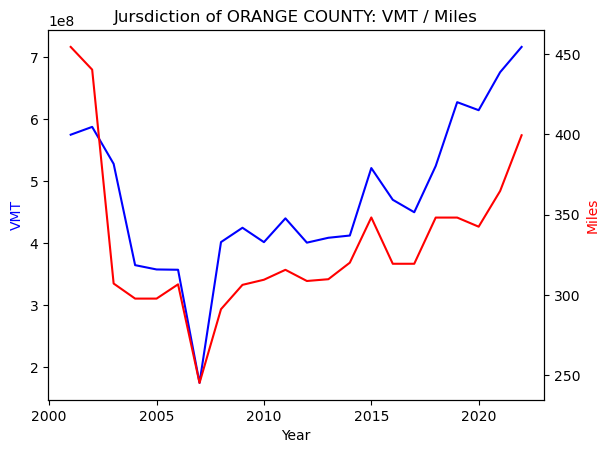

In [42]:
OC_info('ORANGE COUNTY')

In [ ]:
pd.read_excel('OC.xlsx', sheet_name='2022')[pd.read_excel('OC.xlsx', sheet_name='2022')['JURISDICTION'] == 'ORANGE']['MILES TOTAL'].iloc[0] - pd.read_excel(
    'OC.xlsx', sheet_name='2001')[pd.read_excel('OC.xlsx', sheet_name='2001')['JURISDICTION'] == 'ORANGE']['MILES TOTAL'].iloc[0]

In [ ]:
df_ALL = pd.read_excel('OC.xlsx', sheet_name= 'Sheet2')
df_HWY = pd.read_excel('OC.xlsx', sheet_name= 'Sheet3')

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot VMT on the left axis
ax1.plot(df_ALL['Year'], df_ALL['VMT'], color='b', label='VMT')
ax1.set_xlabel('Year')
ax1.set_ylabel('VMT', color='b')
#ax1.tick_params('y', colors='b')

# Create a second y-axis for State Highway Miles
ax2 = ax1.twinx()
ax2.plot(df_ALL['Year'], df_ALL['Mileage'], color='r', label='County Mileage')
ax2.set_ylabel('County Mileage', color='r')
#ax2.tick_params('y', colors='r')

# Title and legend
plt.title('OC: County Mileage / VMT')
#plt.legend(loc='upper left')

# Show the plot
plt.show()

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot VMT on the left axis
ax1.plot(df_HWY['YEAR'], df_HWY['VMT'], color='b', label='VMT')
ax1.set_xlabel('Year')
ax1.set_ylabel('VMT', color='b')
#ax1.tick_params('y', colors='b')

# Create a second y-axis for State Highway Miles
ax2 = ax1.twinx()
ax2.plot(df_HWY['YEAR'], df_HWY['STATE HIGHWAY MILES'], color='r', label='State Highway Miles')
ax2.set_ylabel('State Highway Miles', color='r')
#ax2.tick_params('y', colors='r')

# Title and legend
plt.title('OC: State Highway Miles / VMT')
#plt.legend(loc='upper left')

# Show the plot
plt.show()